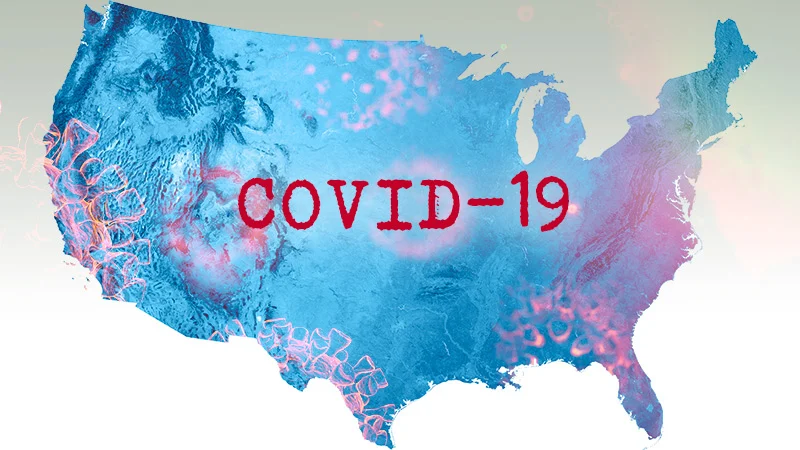

In [1]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import geojson
from bubbly.bubbly import bubbleplot
import plotly.express as px
import plotly.offline as py*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('USA_covid19.csv')
df

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54      NaN   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             US  2020-05-21 02:32:54  27.7663   
12                   Georgia             US  2020-05-21 02:32:54  33.0406   
13            Grand Princess             US  2020-05-21 02:32:54      NaN   
14                      Guam             US  2020-05-21 02:32:54  13.4443   
15                    Hawaii             US  2020-05-21 02:32:54  21.0943   
16                     Idaho             US  2020-05-21 02:32:54  44.2405   
17                  Illinois             US  2020-05-21 02:32:54  40.3495   
18                   Indiana             US  2020-05-21 02:32:54  39.8494   
19                      Iowa             US  2020-05-21 02:32:54  42.0115   
20                    Kansas             US  2020-05-21 02:32:54  38.5266   
21                  Kentucky             US  2020-05-21 02:32:54  37.6681   
22                 Louisiana             US  2020-05-21 02:32:54  31.1695   
23                     Maine             US  2020-05-21 02:32:54  44.6939   
24                  Maryland             US  2020-05-21 02:32:54  39.0639   
25             Massachusetts             US  2020-05-21 02:32:54  42.2302   
26                  Michigan             US  2020-05-21 02:32:54  43.3266   
27                 Minnesota             US  2020-05-21 02:32:54  45.6945   
28               Mississippi             US  2020-05-21 02:32:54  32.7416   
29                  Missouri             US  2020-05-21 02:32:54  38.4561   
30                   Montana             US  2020-05-21 02:32:54  46.9219   
31                  Nebraska             US  2020-05-21 02:32:54  41.1254   
32                    Nevada             US  2020-05-21 02:32:54  38.3135   
33             New Hampshire             US  2020-05-21 02:32:54  43.4525   
34                New Jersey             US  2020-05-21 02:32:54  40.2989   
35                New Mexico             US  2020-05-21 02:32:54  34.8405   
36                  New York             US  2020-05-21 02:32:54  42.1657   
37            North Carolina             US  2020-05-21 02:32:54  35.6301   
38              North Dakota             US  2020-05-21 02:32:54  47.5289   
39  Northern Mariana Islands             US  2020-05-21 02:32:54  15.0979   
40                      Ohio             US  2020-05-21 02:32:54  40.3888   
41                  Oklahoma             US  2020-05-21 02:32:54  35.5653   
42                    Oregon             US  2020-05-21 02:32:54  44.5720   
43              Pennsylvania             US  2020-05-21 02:32:54  40.5908   
44               Puerto Rico             US  2020-05-21 02:32:54  18.2208   
45              Rhode Island             US  2020-05-21 02:32:54  41.6809   
46            South Carolina             US  2020-05-21 02:32:54  33.8569   
47              South Dakota             US  2020-05-21 02:32:54  44.2998   
48                 Tennessee             US  2020-05-21 02:32:54  35.7478   
49                     Texas             US  2020-05-21 02:32:54  31.0545   
50                      Utah             US  2020-05-21 02:32:54  40.1500   
51        

By observing above data diamond princess and grand princess region has lot of missing values so we can remove those

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [4]:
df.shape

(58, 18)

In [5]:
df['ISO3'].value_counts()

USA    53
VIR     1
PRI     1
ASM     1
MNP     1
GUM     1
Name: ISO3, dtype: int64

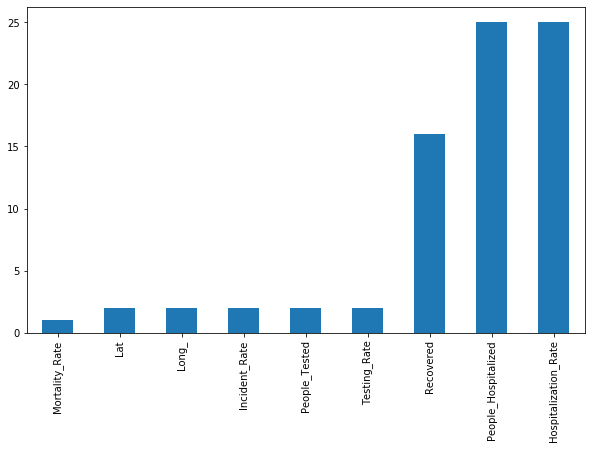

In [6]:
missing=df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10,6))
missing.plot.bar()

lets search the mean and then replace the missing values

In [7]:
df['Mortality_Rate'].mean()

4.458247989218647

In [8]:
df['Incident_Rate'].mean()

396.23080551083666

In [9]:
df['People_Tested'].mean()

225853.4107142857

In [10]:
df['Recovered'].mean()

7007.428571428572

In [11]:
df['People_Hospitalized'].mean()

4897.454545454545

In [12]:
df['Hospitalization_Rate'].mean()

14.342541433640415

In [13]:
df['Testing_Rate'].mean()

3894.186869685221

In [14]:
#drop 9,13 rows because those two rows has lot of null values they are not useful
df.drop([9,13],axis=0,inplace=True)

In [15]:
#replace missing values with this mean
cv=df.fillna({
    'Mortality_Rate':4.458247989,
    'Incident_Rate':396.23080551083666,
    'People_Tested':225853.4107142857,
    'Recovered':7007.428571428572,
    'People_Hospitalized':4897.454545454545,
    'Hospitalization_Rate':14.342541433640415,
    'Testing_Rate':3894.186869685221
})

In [16]:
cv.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

Here you can see there are no null values

In [17]:
cv.describe()

Lat       Long_      Confirmed        Deaths     Recovered  \
count  56.000000   56.000000      56.000000     56.000000     56.000000   
mean   36.840089  -85.206614   27708.946429   1668.500000   7007.428571   
std    10.887035   49.754449   53258.072431   4146.608003  10079.720781   
min   -14.271000 -170.132000       0.000000      0.000000     13.000000   
25%    34.594600 -101.165775    3567.250000     86.750000   1231.250000   
50%    39.061850  -87.944200   11325.000000    400.000000   4473.000000   
75%    42.361650  -76.970625   30304.000000   1493.750000   7007.428571   
max    61.370700  145.673900  354370.000000  28636.000000  61886.000000   

              Active       FIPS  Incident_Rate  People_Tested  \
count      56.000000  56.000000      56.000000   5.600000e+01   
mean    20784.875000  32.535714     396.230806   2.258534e+05   
std     41859.319213  19.075891     402.682539   2.987834e+05   
min         0.000000   1.000000       0.000000   1.240000e+02   
25%      1024.750000  17.750000     148.521021   4.608100e+04   
50%      6204.500000  31.500000     250.477287   1.386545e+05   
75%     19762.750000  46.250000     477.888542   2.796948e+05   
max    263848.000000  78.000000    1821.620216   1.505836e+06   

       People_Hospitalized  Mortality_Rate           UID  Testing_Rate  \
count            56.000000       56.000000  5.600000e+01     56.000000   
mean           4897.454545        4.565460  7.650007e+07   3894.186870   
std           10057.602521        2.055381  2.416972e+07   1933.169297   
min              65.000000        1.101269  1.600000e+01     97.702058   
25%            1367.750000        3.261700  8.400001e+07   2712.800274   
50%            4897.454545        4.425647  8.400003e+07   3469.782532   
75%            4897.454545        5.487604  8.400004e+07   4763.649736   
max           76410.000000        9.545549  8.400006e+07  11377.424693   

       Hospitalization_Rate  
count             56.000000  
mean              14.342541  
std                3.850008  
min                6.778043  
25%               12.739363  
50%               14.342541  
75%               15.775153  
max               28.054438

As you see here the mean and min values are larger difference and 75%,max also have larger differencein long_

In [18]:
#lets check proportion for confirmed,recoverd,deaths,active,incident_rate,mortality_rate,testing_rate,hospitalization_rate
state_details=pd.pivot_table(cv, values=['Confirmed','Recovered','Deaths','Active','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate'],index='Province_State',aggfunc='max')
state_details['Recovery_rate']=round(state_details['Recovered']/state_details['Confirmed'],2)
state_details['Death_rate']=round(state_details['Deaths']/state_details['Confirmed'],2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='RdPu')

Here people tested is higher in new york followed by California 

In [19]:
Recovery_rate=state_details['Recovery_rate']

In [20]:
Death_rate=state_details['Death_rate']

In [21]:
from folium.plugins import HeatMap
#center of map
cities_map = folium.Map(location = [40,-99],tiles='OpenStreetMap', zoom_start = 4)
# add tile layers to the map
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain','stamentoner','cartoDB dark_matter','Mapbox Control Room','Mapbox Bright']
for tile in tiles:
    folium.TileLayer(tile).add_to(cities_map)
#add data in one variable
heat_data = [[row['Lat'],row['Long_'],row['Confirmed']] for index, row in cv.iterrows()]
HeatMap(heat_data,radius=12, blur = 6).add_to(cities_map)
#add fullscreen
plugins.Fullscreen(position='topright').add_to(cities_map)
#add layers
folium.LayerControl(collapsed=True).add_to(cities_map)
#lets see the map
cities_map

HERE YOU CAN SEE CONFIRMED CASES IN PROVINCE_STATE OF USA THE DARKER COLOR SHOWS HIGHER NUMBER 

In [22]:
#center of map
cities_map = folium.Map(location = [40,-99],tiles='OpenStreetMap', zoom_start = 4)
# add tile layers to the map
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain','stamentoner','cartoDB dark_matter','Mapbox Control Room','Mapbox Bright']
for tile in tiles:
    folium.TileLayer(tile).add_to(cities_map)
#add data in one variable
heat_data = [[row['Lat'],row['Long_'],row['Deaths']] for index, row in cv.iterrows()]
HeatMap(heat_data,radius=12, blur = 6).add_to(cities_map)
#add fullscreen
plugins.Fullscreen(position='topright').add_to(cities_map)
#add layers
folium.LayerControl(collapsed=True).add_to(cities_map)
#lets see the map
cities_map

HERE YOU CAN SEE DEATHS CASES IN PROVINCE_STATE OF USA THE DARKER COLOR SHOWS HIGHER NUMBER

In [23]:
#center of map
cities_map = folium.Map(location = [40,-99],tiles='OpenStreetMap', zoom_start = 4)
# add tile layers to the map
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain','stamentoner','cartoDB dark_matter','Mapbox Control Room','Mapbox Bright']
for tile in tiles:
    folium.TileLayer(tile).add_to(cities_map)
#add data in one variable
heat_data = [[row['Lat'],row['Long_'],row['Recovered']] for index, row in cv.iterrows()]
HeatMap(heat_data,radius=12, blur = 6).add_to(cities_map)
#add fullscreen
plugins.Fullscreen(position='topright').add_to(cities_map)
#add layers
folium.LayerControl(collapsed=True).add_to(cities_map)
#lets see the map
cities_map

HERE YOU CAN SEE RECOVERED CASES IN PROVINCE_STATE OF USA THE DARKER COLOR SHOWS HIGHER NUMBER

In [24]:
#center of map
cities_map = folium.Map(location =[40,-99],tiles='OpenStreetMap', zoom_start = 4)
# add tile layers to the map
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain','stamentoner','cartoDB dark_matter','Mapbox Control Room','Mapbox Bright']
for tile in tiles:
    folium.TileLayer(tile).add_to(cities_map)
#add data in one variable
heat_data = [[row['Lat'],row['Long_'],row['Active']] for index, row in cv.iterrows()]
HeatMap(heat_data,radius=12, blur = 6).add_to(cities_map)
#add fullscreen
plugins.Fullscreen(position='topright').add_to(cities_map)
#add layers
folium.LayerControl(collapsed=True).add_to(cities_map)
#lets see the map
cities_map

HERE YOU CAN SEE ACTIVE CASES IN PROVINCE_STATE OF USA THE DARKER COLOR SHOWS HIGHER NUMBER

In [25]:
import json

In [26]:
usa_states=json.load(open('usa_states.geojson','r'))

In [27]:
fig=px.choropleth(cv,geojson=usa_states,locations='FIPS',color='Incident_Rate',
                 color_continuous_scale='Reds',
                 range_color=(0,500),
                 scope='usa',
                 labels={'Confirmed':'confirm'}
                 )
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [28]:
fig=px.choropleth(cv,geojson=usa_states,locations='FIPS',color='Testing_Rate',
                 color_continuous_scale='viridis',
                 range_color=(0,8000),
                 scope='usa',
                 labels={'Confirmed':'confirm'}
                 )
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [29]:
fig=px.choropleth(cv,geojson=usa_states,locations='FIPS',color='Hospitalization_Rate',
                 color_continuous_scale='purples',
                 range_color=(0,25),
                 scope='usa',
                 labels={'Confirmed':'confirm'}
                 )
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [30]:
fig=px.choropleth(cv,geojson=usa_states,locations='FIPS',color='Mortality_Rate',
                 color_continuous_scale='Blues',
                 range_color=(0,10),
                 scope='usa',
                 labels={'Confirmed':'confirm'}
                 )
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [31]:
fig = px.treemap(cv, path=['Province_State'],hover_data=['Province_State','Mortality_Rate','Incident_Rate','Testing_Rate','Hospitalization_Rate','People_Tested','People_Hospitalized'],values='Confirmed')
fig.update_layout(
    title='USA Covid19 data')
fig.show()

In [32]:
fig=bubbleplot(dataset=cv,x_column='Deaths',y_column='Confirmed',
               bubble_column='Province_State',
              size_column='Deaths',
              color_column='Province_State',
              x_title='Deaths',y_title='Confirmed cases',title='confirmed and death rate',
              x_logscale=False,scale_bubble=3,height=650)
py.iplot(fig,config={'scrollzoom':False})

In [33]:
fig=bubbleplot(dataset=cv,x_column='Active',y_column='Confirmed',
               bubble_column='Province_State',
              size_column='Active',
              color_column='Province_State',
              x_title='Active',y_title='Confirmed cases',title='confirmed and active cases',
              x_logscale=False,scale_bubble=3,height=650)
py.iplot(fig,config={'scrollzoom':False})


In [34]:
fig=bubbleplot(dataset=cv,x_column='Mortality_Rate',y_column='Confirmed',
               bubble_column='Province_State',
              size_column='Mortality_Rate',
              color_column='Province_State',
              x_title='Mortality_Rate',y_title='Confirmed cases',title='confirmed and mortality rate',
              x_logscale=False,scale_bubble=3,height=650)
py.iplot(fig,config={'scrollzoom':False})

In [35]:
#lets add this to data for better understanding
cv['Death_rate']=round(cv['Deaths']/cv['Confirmed'],2)

In [36]:
cv['Recovery_rate']=round(cv['Recovered']/cv['Confirmed'],2)

In [37]:
#replace nan value with mode
cv['Death_rate'].fillna(cv['Death_rate'].mode()[0],inplace=True)

In [38]:
fig=bubbleplot(dataset=cv,x_column='Death_rate',y_column='Confirmed',
               bubble_column='Province_State',
              size_column='Death_rate',
              color_column='Province_State',
              x_title='Death_rate',y_title='Confirmed cases',title='confirmed and death rate',
              x_logscale=False,scale_bubble=3,height=650)
py.iplot(fig,config={'scrollzoom':False})

In [39]:
top_10_province_confirmed=state_details['Confirmed'].head(10)
top_10_province_deaths=state_details['Deaths'].head(10)
top_10_province_active=state_details['Active'].head(10)
top_10_province_recovery=state_details['Recovery_rate'].head(10)

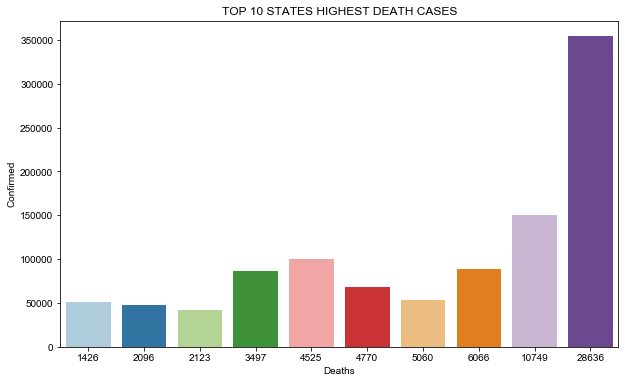

In [40]:
plt.figure(figsize=(10,6))
plt.title('TOP 10 STATES HIGHEST DEATH CASES')
sns.barplot(y=top_10_province_confirmed,x=top_10_province_deaths,palette='Paired')
sns.set(style='whitegrid')
plt.show()

In [41]:
top_10_province_deaths

Province_State
New York         28636
New Jersey       10749
Illinois          4525
Massachusetts     6066
California        3497
Pennsylvania      4770
Michigan          5060
Texas             1426
Florida           2096
Maryland          2123
Name: Deaths, dtype: int64

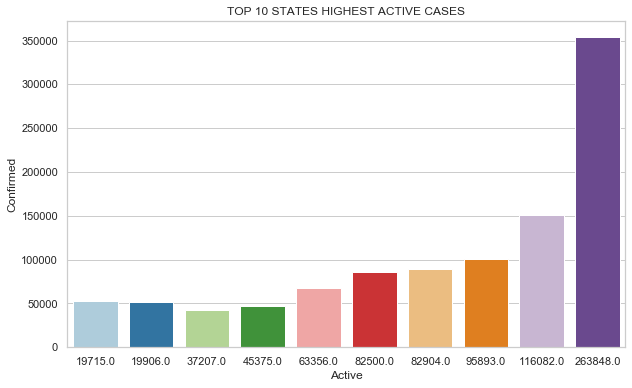

In [42]:
plt.figure(figsize=(10,6))
plt.title('TOP 10 STATES HIGHEST ACTIVE CASES')
sns.barplot(y=top_10_province_confirmed,x=top_10_province_active,palette='Paired')
plt.show()

In [43]:
top_10_province_active

Province_State
New York         263848.0
New Jersey       116082.0
Illinois          95893.0
Massachusetts     82904.0
California        82500.0
Pennsylvania      63356.0
Michigan          19715.0
Texas             19906.0
Florida           45375.0
Maryland          37207.0
Name: Active, dtype: float64

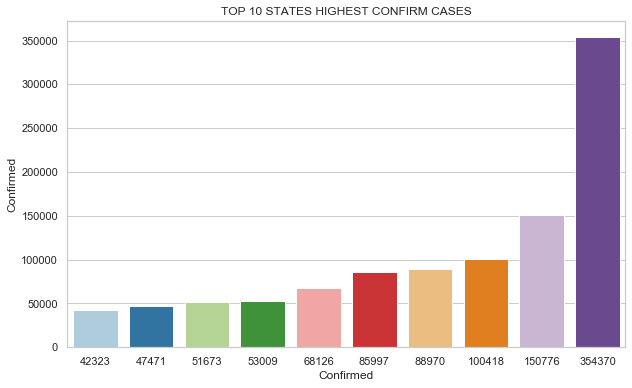

In [44]:
plt.figure(figsize=(10,6))
plt.title('TOP 10 STATES HIGHEST CONFIRM CASES')
sns.barplot(y=top_10_province_confirmed,x=top_10_province_confirmed,palette='Paired')
plt.show()

In [45]:
top_10_province_confirmed

Province_State
New York         354370
New Jersey       150776
Illinois         100418
Massachusetts     88970
California        85997
Pennsylvania      68126
Michigan          53009
Texas             51673
Florida           47471
Maryland          42323
Name: Confirmed, dtype: int64

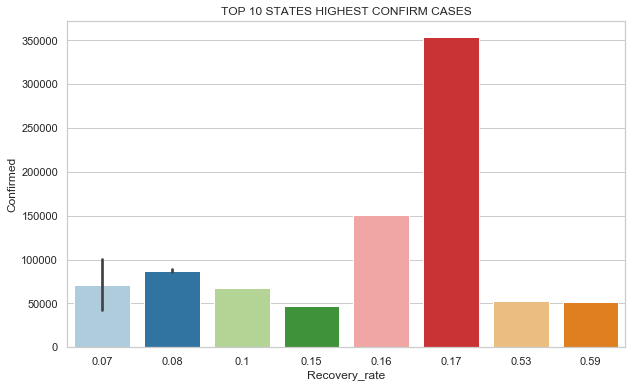

In [46]:
plt.figure(figsize=(10,6))
plt.title('TOP 10 STATES HIGHEST CONFIRM CASES')
sns.barplot(x=top_10_province_recovery,y=top_10_province_confirmed,palette='Paired')
plt.show()

In [47]:
top_10_province_recovery

Province_State
New York         0.17
New Jersey       0.16
Illinois         0.07
Massachusetts    0.08
California       0.08
Pennsylvania     0.10
Michigan         0.53
Texas            0.59
Florida          0.15
Maryland         0.07
Name: Recovery_rate, dtype: float64

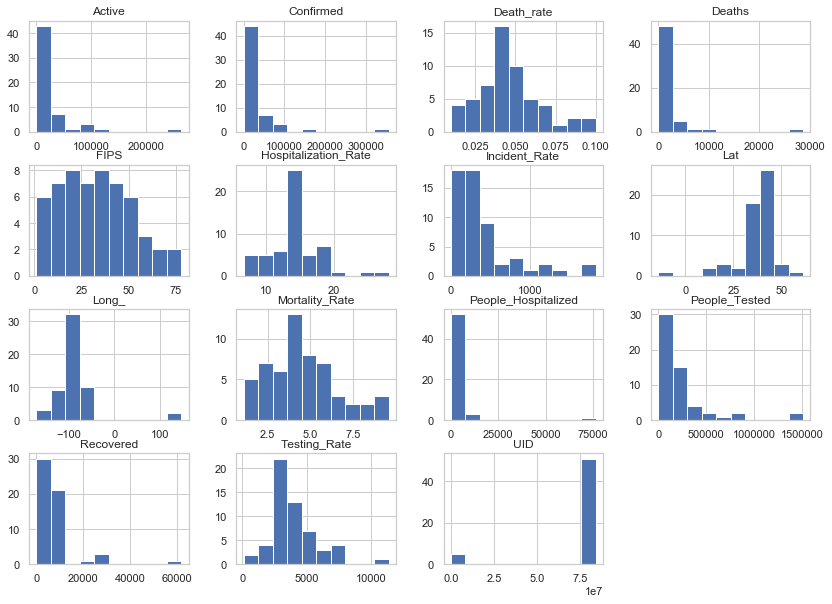

In [48]:
cv=cv.drop(columns=['Recovery_rate'])
cv.hist(figsize=(14,10))
plt.show()

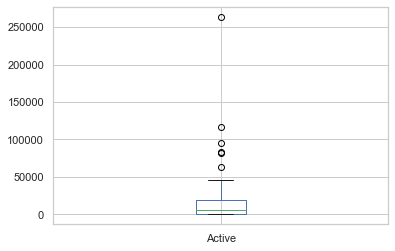

In [49]:
#check outliers
cv['Active'].plot.box()

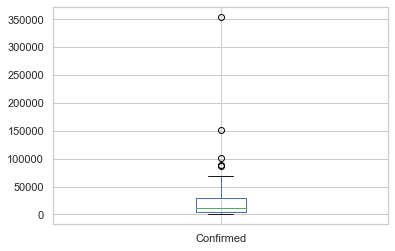

In [50]:
cv['Confirmed'].plot.box()

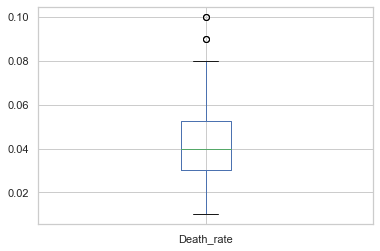

In [51]:
cv['Death_rate'].plot.box()

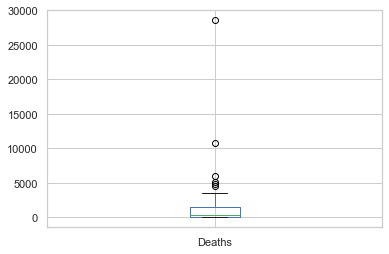

In [52]:
cv['Deaths'].plot.box()

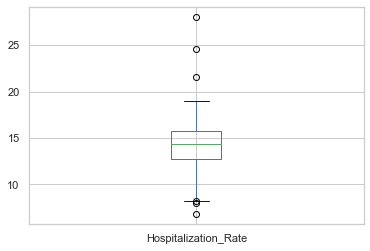

In [53]:
cv['Hospitalization_Rate'].plot.box()

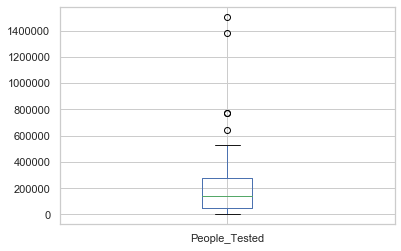

In [54]:
cv['People_Tested'].plot.box()

In [55]:
#use label encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le_count=0
for col in df.columns[1:]:
    if df[col].dtype=='object':
        if len(list(cv[col].unique())) <=10:
            le.fit(cv[col])
            cv[col]=le.transform(cv[col])
            le_count +=1
print('{}columns were label encoded.'.format(le_count))

3columns were label encoded.


In [56]:
cv.dtypes

Province_State           object
Country_Region            int32
Last_Update               int32
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
Death_rate              float64
dtype: object

In [57]:
label=le.fit_transform(cv['Province_State'])

In [58]:
cv.drop(columns=['Province_State'])
cv['Province_State']=label

In [59]:
#drop Country_region ,last update they are no use for this date
cv=cv.drop(columns=['Country_Region','Last_Update','Lat','Long_','UID','ISO3','FIPS'])

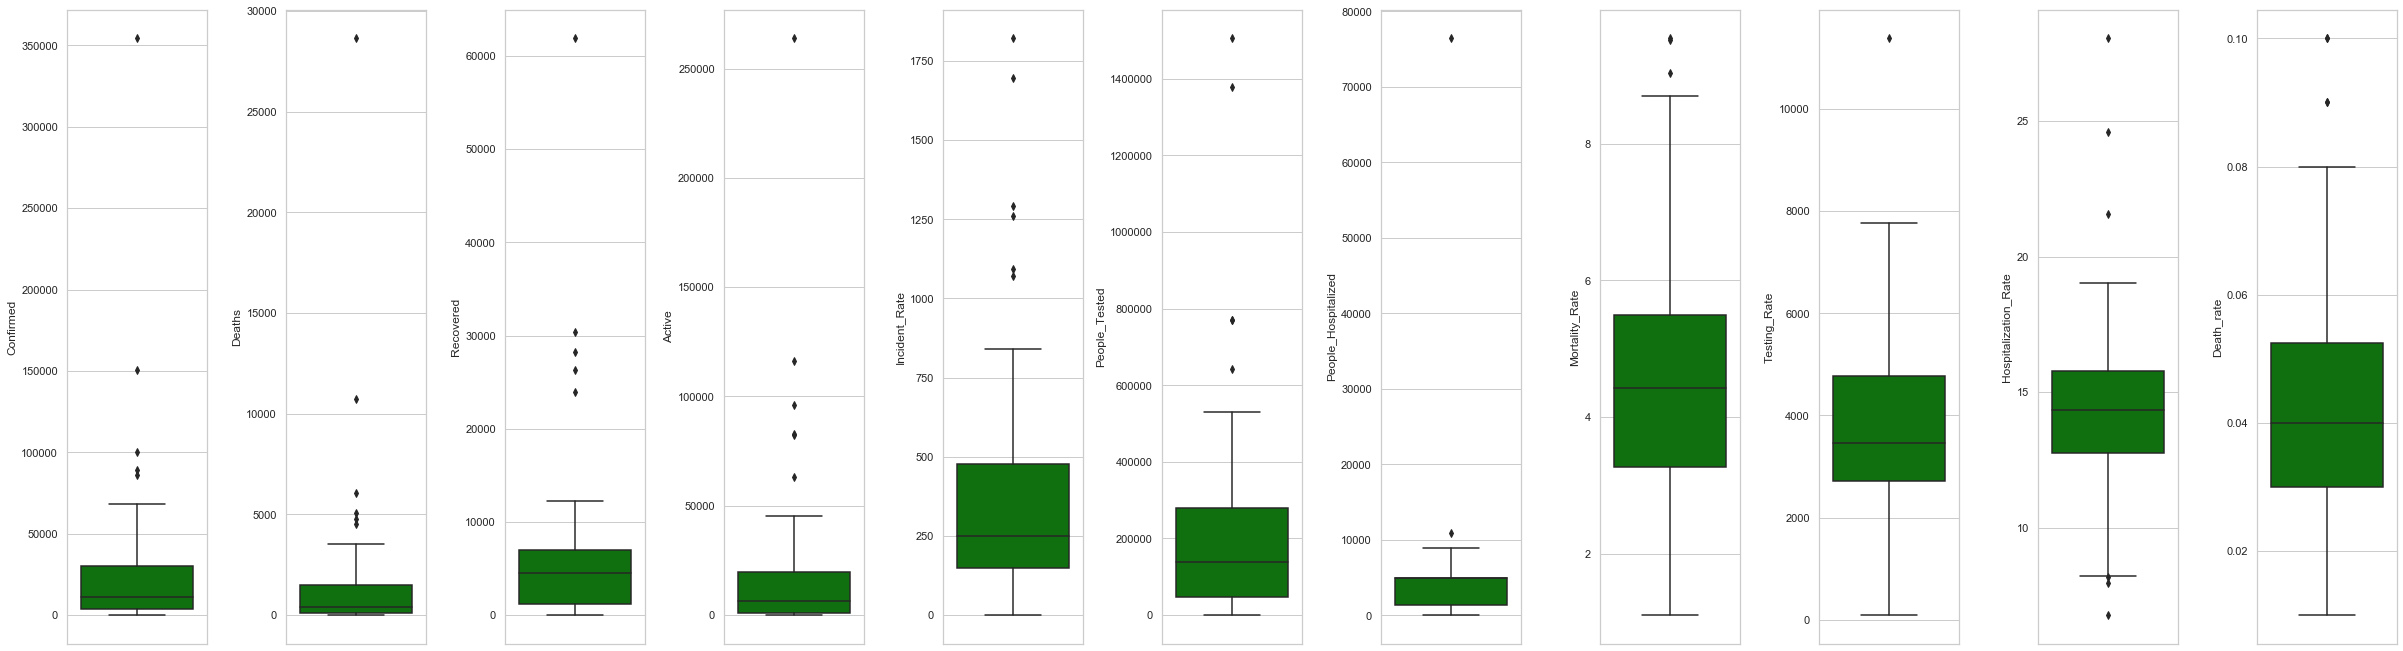

In [60]:
#lets see outliers at once
collist=cv.columns.values
ncol=18
nrows=20
plt.figure(figsize=(3*ncol,10*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(cv[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [61]:
#check skeness
cv.skew()

Province_State          0.000000
Confirmed               4.646063
Deaths                  5.404018
Recovered               3.587704
Active                  4.116348
Incident_Rate           1.955650
People_Tested           2.783163
People_Hospitalized     6.756462
Mortality_Rate          0.599877
Testing_Rate            1.291806
Hospitalization_Rate    0.853076
Death_rate              0.672480
dtype: float64

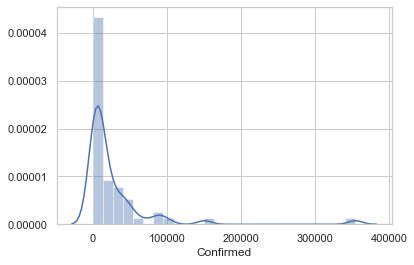

In [62]:
sns.distplot(cv['Confirmed'])

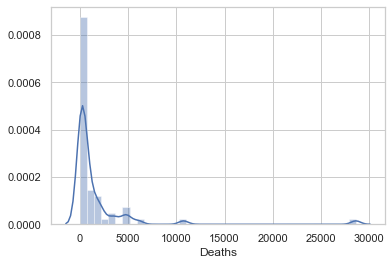

In [63]:
sns.distplot(cv['Deaths'])

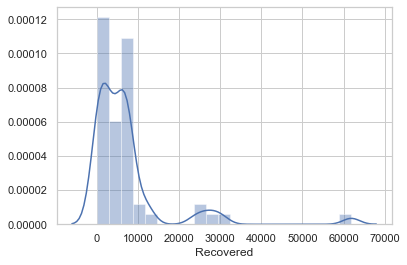

In [64]:
sns.distplot(cv['Recovered'])

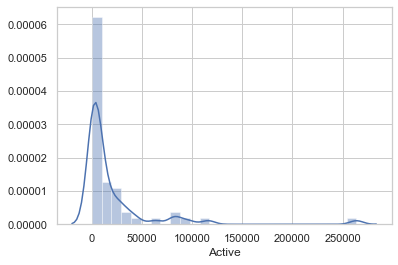

In [65]:
sns.distplot(cv['Active'])

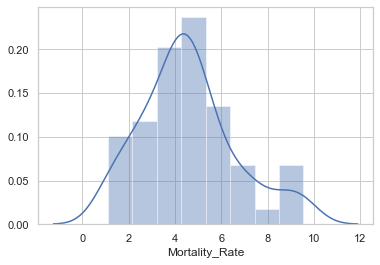

In [66]:
sns.distplot(cv['Mortality_Rate'])

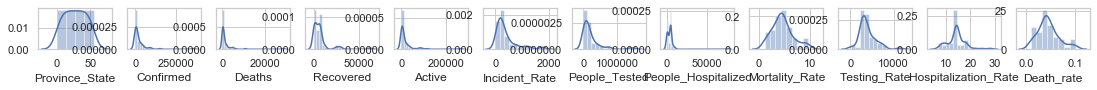

In [67]:
collist=cv.columns.values
ncol=19
nrows=20
plt.figure(figsize=(30,18))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(cv[collist[i]])

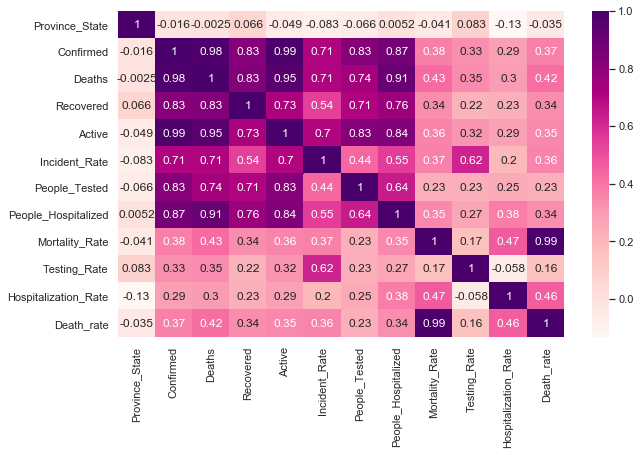

In [68]:
#check correlation
cv_cor=cv.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cv_cor,annot=True,cmap='RdPu')
plt.show()

AS YOU CAN OBSERVE THAT DARK COLOR SHOWS POSITIVE CORRELATION LIGHTER COLOR SHOWS NEGATIVE CORRELATION

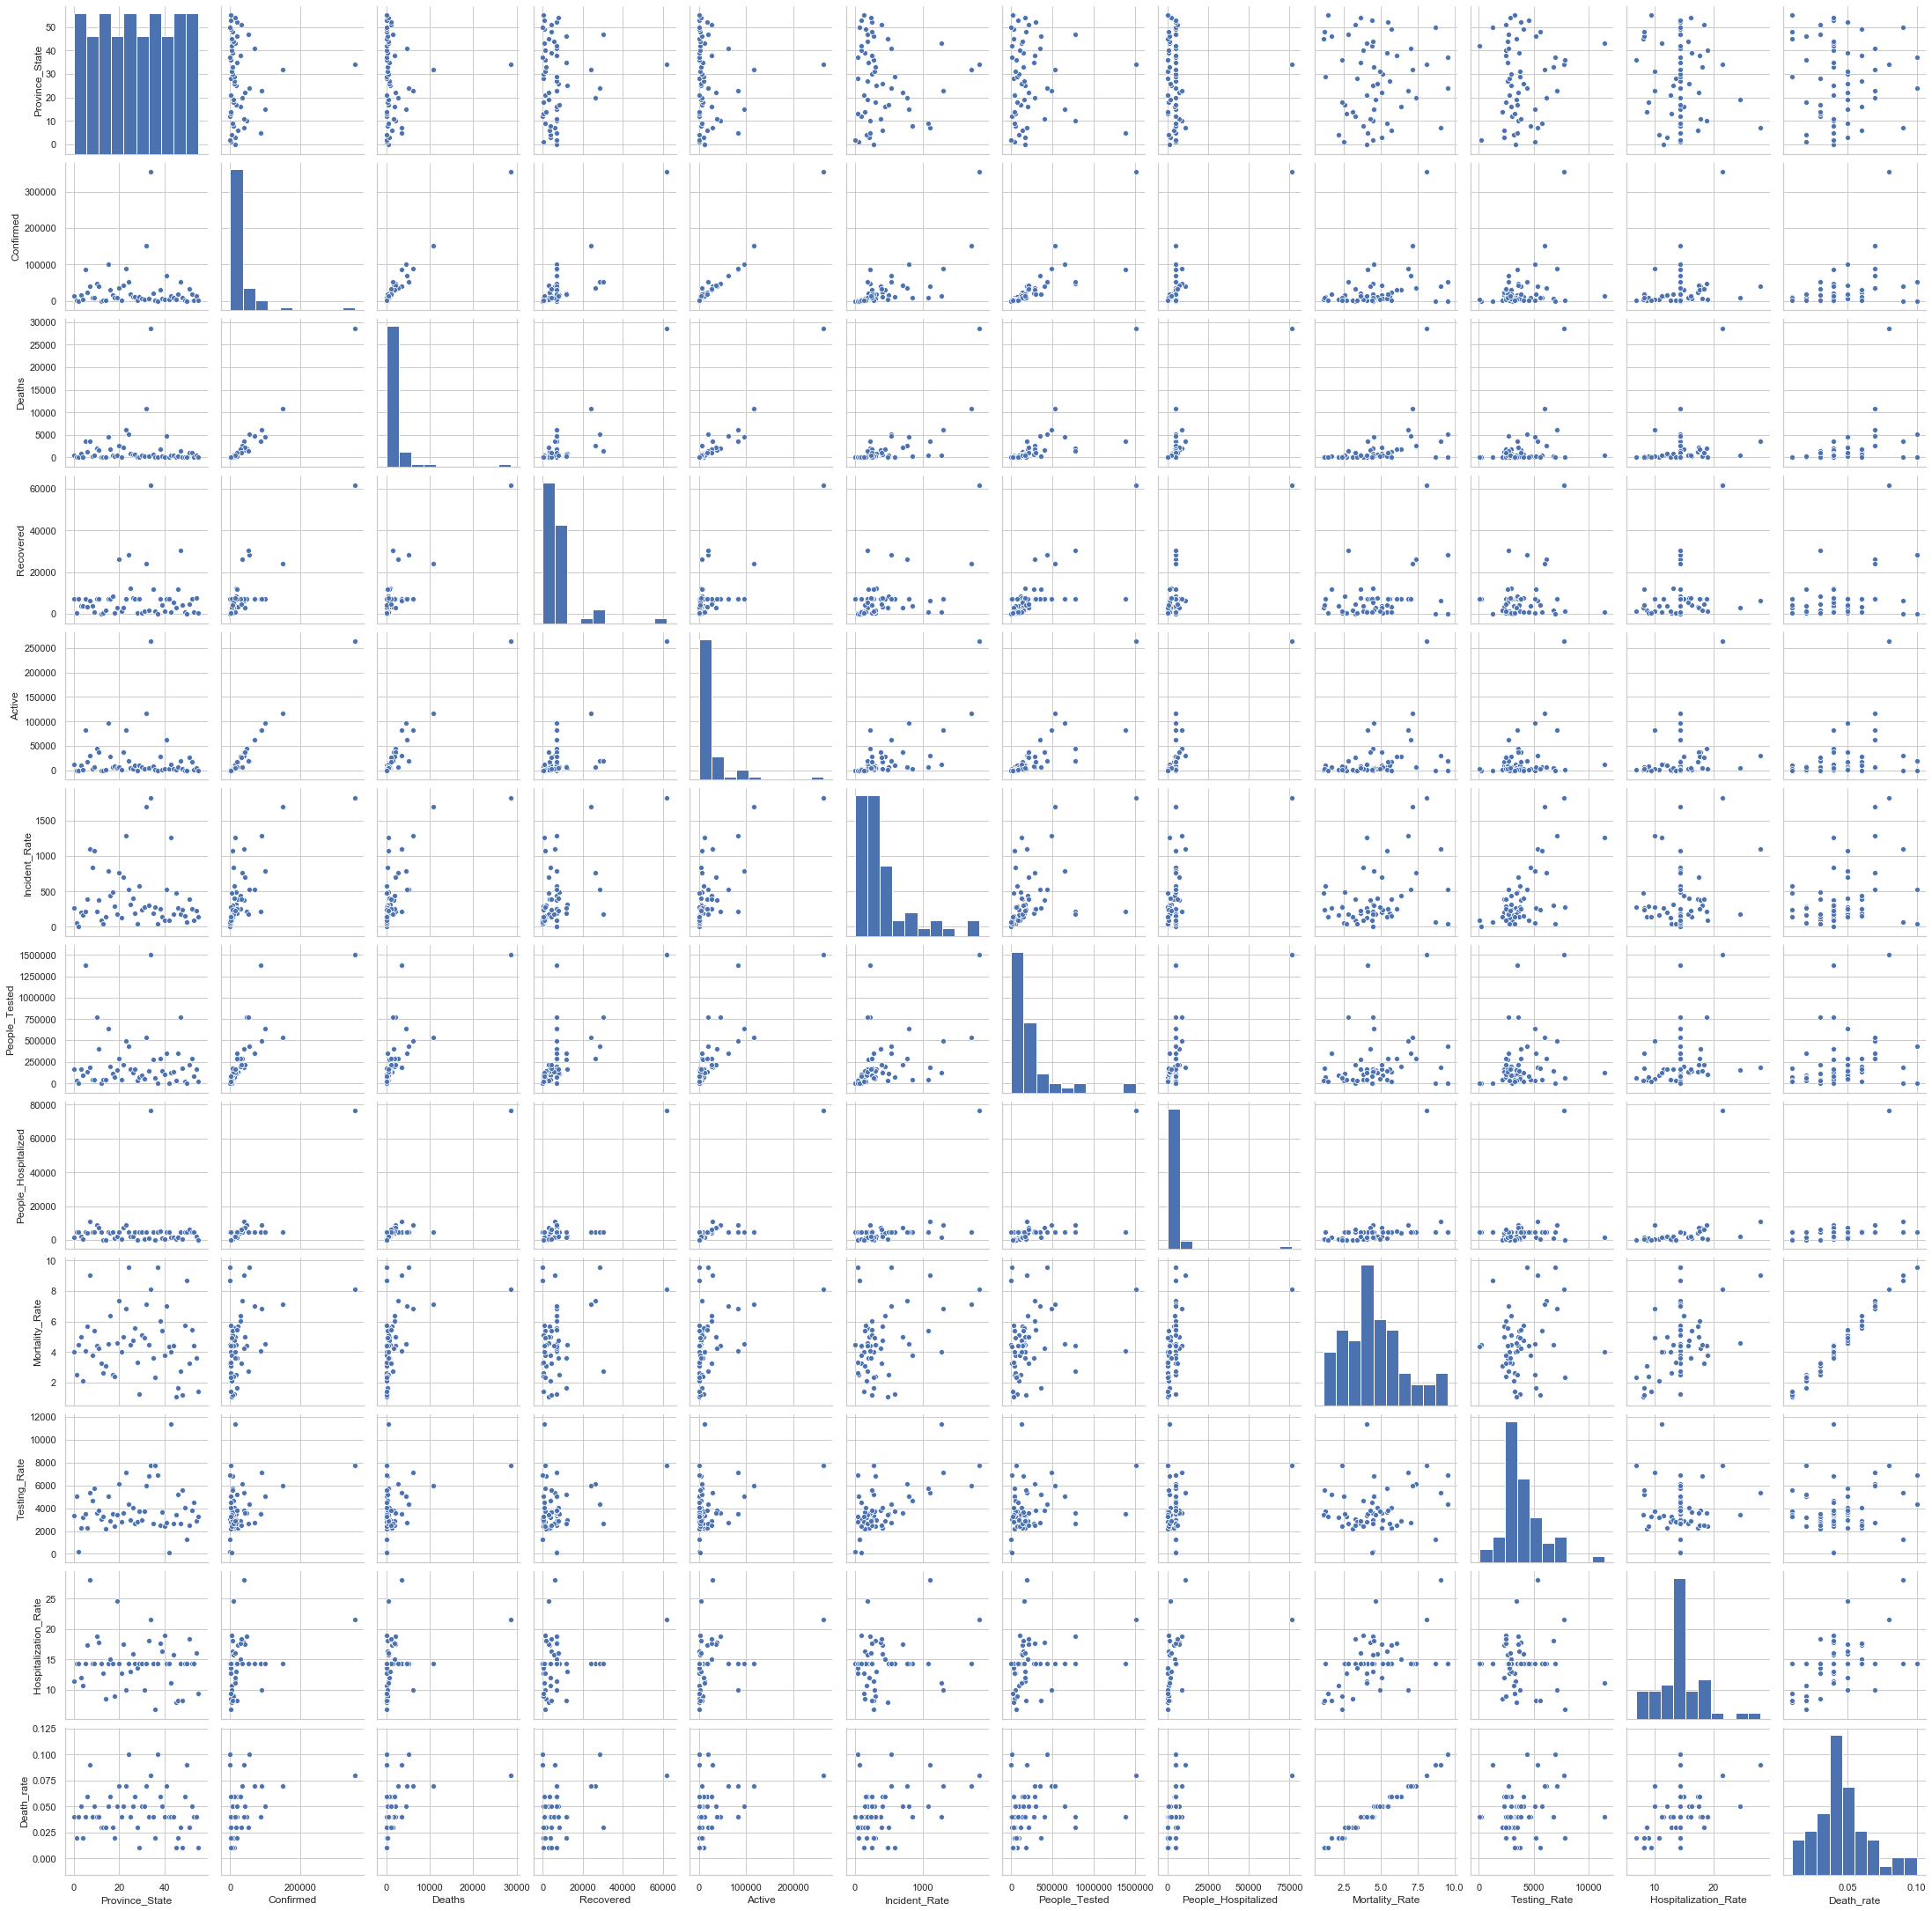

In [69]:
sns.pairplot(cv)

In [70]:
#Removing outliers
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(cv))
z

array([[1.70139262e+00, 2.77696704e-01, 2.78993282e-01, 0.00000000e+00,
        1.98989889e-01, 3.25848024e-01, 2.07371343e-01, 3.41559006e-01,
        2.77902712e-01, 2.81989619e-01, 7.61026862e-01, 2.44128848e-01],
       [1.63952380e+00, 5.17387899e-01, 4.03585136e-01, 6.66254559e-01,
        5.00094715e-01, 8.55525316e-01, 6.37642979e-01, 9.12469536e-17,
        1.01705882e+00, 6.10572166e-01, 0.00000000e+00, 1.18697130e+00],
       [1.57765497e+00, 5.24985415e-01, 4.06018571e-01, 0.00000000e+00,
        5.01034839e-01, 9.92883075e-01, 7.62332426e-01, 9.12469536e-17,
        5.26337068e-02, 1.91631173e+00, 0.00000000e+00, 2.44128848e-01],
       [1.51578615e+00, 2.42570036e-01, 2.24241003e-01, 3.23788732e-01,
        2.50672600e-01, 4.79719109e-01, 2.04044805e-01, 3.11561207e-01,
        2.18928066e-01, 8.46278941e-01, 6.08190292e-01, 2.27292376e-01],
       [1.45391733e+00, 4.30196461e-01, 3.79980820e-01, 3.15880285e-01,
        4.75868444e-01, 5.77461217e-01, 4.37669082e-01, 4.37

In [72]:
threshold=3
print(np.where(z>3))

(array([ 5,  7, 32, 34, 34, 34, 34, 34, 34, 34, 43], dtype=int64), array([ 6, 10,  5,  1,  2,  3,  4,  5,  6,  7,  9], dtype=int64))


In [73]:
z[5][6]

3.898184320056198

In [74]:
cv_new=cv[(z<3).all(axis=1)]

In [75]:
print(cv.shape,cv_new.shape)

(56, 12) (51, 12)


In [76]:
cv=cv_new

5 outliers are removed

In [77]:
cv.head()

Province_State  Confirmed  Deaths    Recovered   Active  Incident_Rate  \
0               0      13052     522  7007.428571  12530.0     266.194321   
1               1        401      10   352.000000     39.0      54.815493   
2               2          0       0  7007.428571      0.0       0.000000   
3               3      14906     747  3773.000000  10386.0     204.788838   
4               4       5003     107  3852.000000   1044.0     165.782801   

   People_Tested  People_Hospitalized  Mortality_Rate  Testing_Rate  \
0       164450.0          1493.000000        3.999387   3353.942386   
1        37045.0          4897.454545        2.493766   5063.940017   
2          124.0          4897.454545        4.458248    222.857246   
3       165435.0          1792.000000        5.011405   2272.859351   
4        96258.0           535.000000        2.138717   3189.670370   

   Hospitalization_Rate  Death_rate  
0             11.438860        0.04  
1             14.342541        0.02  
2             14.342541        0.04  
3             12.022005        0.05  
4             10.693584        0.02

In [78]:
x=cv.drop(columns=['Confirmed'])
x.head()

Province_State  Deaths    Recovered   Active  Incident_Rate  People_Tested  \
0               0     522  7007.428571  12530.0     266.194321       164450.0   
1               1      10   352.000000     39.0      54.815493        37045.0   
2               2       0  7007.428571      0.0       0.000000          124.0   
3               3     747  3773.000000  10386.0     204.788838       165435.0   
4               4     107  3852.000000   1044.0     165.782801        96258.0   

   People_Hospitalized  Mortality_Rate  Testing_Rate  Hospitalization_Rate  \
0          1493.000000        3.999387   3353.942386             11.438860   
1          4897.454545        2.493766   5063.940017             14.342541   
2          4897.454545        4.458248    222.857246             14.342541   
3          1792.000000        5.011405   2272.859351             12.022005   
4           535.000000        2.138717   3189.670370             10.693584   

   Death_rate  
0        0.04  
1        0.02  
2        0.04  
3        0.05  
4        0.02

In [79]:
y=pd.DataFrame(cv['Confirmed'])
y.head()

Confirmed
0      13052
1        401
2          0
3      14906
4       5003

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.7167983 , -0.28001919,  0.19566857, -0.02069806, -0.18618224,
        -0.05714797, -0.81312518, -0.19601079, -0.16448909, -0.77241385,
        -0.16374944],
       [-1.65509519, -0.64809678, -0.8246076 , -0.63452009, -0.98229808,
        -0.75474441,  0.60609594, -0.97393239,  0.9321457 ,  0.10495602,
        -1.1462461 ],
       [-1.59339208, -0.65528579,  0.19566857, -0.63643659, -1.18874961,
        -0.95690256,  0.60609594,  0.04107258, -2.17247836,  0.10495602,
        -0.16374944],
       [-1.53168897, -0.11826635, -0.30016883, -0.12605667, -0.41745364,
        -0.05175468, -0.68848051,  0.32687658, -0.85779605, -0.59621218,
         0.32749889],
       [-1.46998586, -0.57836333, -0.28805814, -0.58513324, -0.56436203,
        -0.43052811, -1.21248837, -1.15737833, -0.26983801, -0.9976048 ,
        -1.1462461 ],
       [-1.34657964,  0.27856729, -0.34539228,  0.24908682,  0.30220805,
        -0.23571799,  0.21321321,  0.68168632, -0.84722741,  1.01331249,
         0.818

In [81]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [82]:
# random state value with which our linear model learns maximum
max_r_score=0
for r_state in range (42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 scoring corresponding to',final_r_state,'is',max_r_score)

max r2 scoring corresponding to 47 is 0.9948116470456926


In [83]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(40, 11) (11, 11)
(40, 1) (11, 1)


In [84]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2')
print(a_score)
print(a_score.mean())
print(a_score.std())

[0.90812446 0.96062965 0.99376564 0.97088867 0.98398599 0.45937976
 0.97339695 0.99479423 0.9719538  0.93994696]
0.9156866109183539
0.15409233410056902


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [86]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 2036.157796119512
R2 score: 0.9948116470456926
MAE: 1538.3419253610039
MSE: 4145938.5706982682


In [87]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [88]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
ls.coef_

0.9894330523051963


array([  522.18517369,  5039.08900172,  4524.74812667, 14871.52284188,
        1065.4140354 ,  1581.91914808,  -452.53580501, -4396.38098966,
         -31.65156783,   214.262529  ,  3635.52431422])

In [89]:
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
rd.coef_

0.98943234329048


array([[  522.51286319,  5071.05523734,  4500.59922357, 14824.10947011,
         1079.11341812,  1610.13055345,  -452.8739501 , -4326.14011328,
          -44.61019407,   214.89549727,  3559.0418124 ]])

In [90]:
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9399919953674089


array([ -23.13029514, 4898.45315005, 2200.64690953, 6705.08511183,
       2210.86396839, 5075.17661777,  902.91074662, -224.23709657,
        152.30371405,  303.40465961,  246.50000794])

among three lasso gives good score and coefficient for overfitting and underfitting

BAGGING AND BOOSTING

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=250,random_state=50)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))

0.9126543537239721


In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=250,random_state=47)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(r2_score(y_test,gb_pred))

0.9135655256934793


In [93]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=250,random_state=58)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,ad_pred))

0.8570922038104161


In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
from sklearn import svm
from sklearn.svm import SVR

In [96]:
parameters = {'kernel':('linear','rbf','poly')}
svr=svm.SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [97]:
print(clf.best_params_)

{'kernel': 'linear'}


In [98]:
sv=svm.SVR(kernel='linear')
sv.fit(x,y)
print(sv.coef_)

[[-2.28301507 28.75534224 29.32209953 27.88057199 18.90952053 32.42827211
  21.7525982   9.17748453 -2.46716743  9.70375626 10.31621492]]


In [99]:
print(clf.best_score_)

-0.16287546030165817


In [100]:
#PREDICT THE VALUES
pred=lr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [[19030.14359289]
 [71022.12591761]
 [ 6200.27026406]
 [-2962.07163504]
 [ 8778.77556203]
 [ 5875.08702231]
 [ 2462.57288803]
 [92974.82873689]
 [ 1738.49757725]
 [19287.11985077]
 [11851.95648375]]
actual:     Confirmed
48      18412
43      68126
35       6317
39         21
50       7710
44       2866
38       2095
25      88970
16       2506
37      20262
28      11967


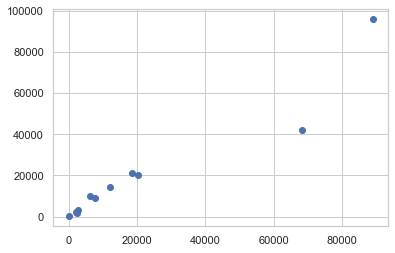

In [101]:
print(plt.scatter(x=y_test,y=gb_pred))
plt.show()

In [102]:
#conclusion as the days passes confirm cases increases 

In [103]:
from joblib import dump,load
dump(cv,'usa_covid19_project.joblib')

['usa_covid19_project.joblib']